## Assignment 8
Just one plot this week! Choose to plot anything you wish, from the data we used so far. Please make it a good plot. Possibly choose data with more than 2 dimensions, so that you are challenging yourself to represent a third dimension graphically (e.g. time, distance, and gas consumed to travel would amount to 3 dimensions: if you had to plot them you could make a plot of distance v time, but you would have to come up with a graphical way to represent the gas usage: color, size, a third dimension...). 

Put thought into the esthetic of the plot, how clearly the content is communicated, avoid clutter, avoid misleading elements, mind your choice of colors accordingly to what was discussed in class. If you wish to violate these rules on purpose you can! but put thoughts into it as well please!



In [21]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import statsmodels.formula.api as smf
import json
import os
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [6]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [23]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

In [24]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False    

In [25]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

In [26]:
totalmales = np.array([allmales['all']['Median income'][1],\
                       allmales['black']['Median income'][1],\
                       allmales['white']['Median income'][1],\
                       allmales['asian']['Median income'][1],\
                       allmales['hispanic']['Median income'][1]])
totalfemales = np.array([allfemales['all']['Median income'][1],\
                        allfemales['black']['Median income'][1],\
                        allfemales['white']['Median income'][1],\
                        allfemales['asian']['Median income'][1],\
                        allfemales['hispanic']['Median income'][1]])

In [11]:
totalmales = np.array(allmales['all']['Median income'].dropna())
totalfemales = np.array(allfemales['all']['Median income'].dropna())
totalfemales=totalfemales[:-1]
df=pd.DataFrame({'totalfemales':totalfemales,\
                'totalmales':totalmales})

In [27]:
import statsmodels.api as sm
mode = smf.ols('totalfemales~totalmales', data=df).fit()
x= pd.DataFrame({'totalmales': np.linspace(0, 45000, 200)})

In [28]:

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())


In [29]:
from scipy import stats
cor = stats.spearmanr(totalmales, totalfemales)
beta1=cor[0]*totalfemales.std()/totalmales.std()
beta0=totalfemales.mean()-beta1*totalmales.mean()


In [31]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,\
                                      allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,\
                                        allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

In [32]:
allmask = [np.isnan(all_males) + np.isnan(all_females)]
all_females.mask = allmask
all_males.mask = allmask

In [33]:
all_females.mask = allmask
all_males.mask = allmask

In [34]:
model_all=np.ma.polyfit(all_males,all_females,1)
print model_all[0], model_all[1]

0.609020523617 1493.03944114


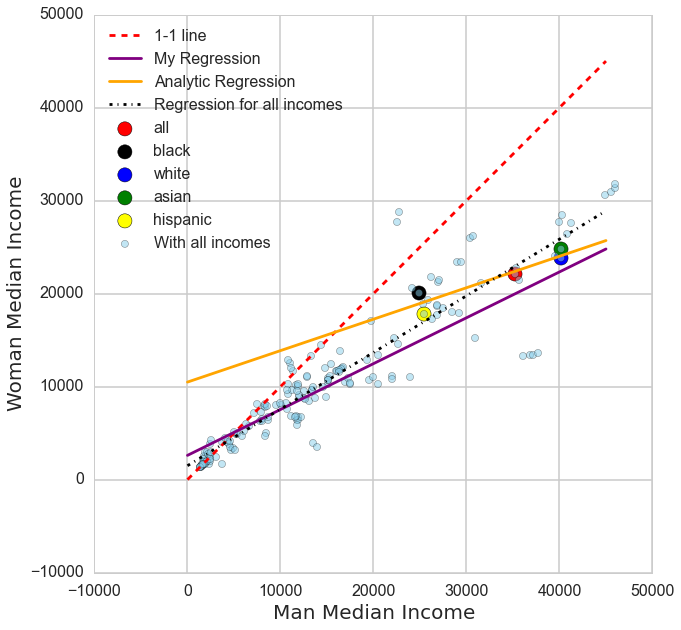

In [48]:
# Final Plot 
pl.figure(figsize=(10,10))
pl.xlim(-10000, 50000)
pl.ylim(-10000, 50000)
pl.xlabel('Man Median Income', size=20)
pl.ylabel('Woman Median Income', size=20)
pointsize = 200
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1],s=pointsize,c='r', label='all')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],s=pointsize,c='k', label='black')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],s=pointsize,c='b', label='white')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],s=pointsize,c='g', label='asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1],s=pointsize,c='yellow', label='hispanic')
pl.plot([0,45000],[0,45000],'k--', label='1-1 line', c='r')
pl.plot(x,mode.predict(x), c='purple', label='My Regression')
pl.plot(x,beta1*x+beta0,c='orange',label='Analytic Regression')
pl.scatter(all_males, all_females, s=50, alpha=0.5, c='skyblue', label='With all incomes')
pl.plot(x,model_all[0]*x+model_all[1],'k-.',label='Regression for all incomes')
pl.legend(loc='best')
plt.savefig('yc2439_income.png')